In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [18]:
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import numpy as np

## CEM Intervention Plots

In [5]:
methods = ['baseline','cem','concept2vec','label','random','shapley','tcav']

In [6]:
data_by_method = {}
for m in methods:
    data_by_method[m] = pickle.load(open("results/intervention/{}.pkl".format(m),"rb"))

In [7]:
data_by_method['baseline']

{0: [{'test_c_accuracy': 0.9643241763114929,
   'test_c_auc': 0.9431280493736267,
   'test_c_f1': 0.943856954574585,
   'test_y_accuracy': 0.78822922706604,
   'test_y_auc': 0.0,
   'test_y_f1': 0.27176806330680847,
   'test_concept_loss': 0.6218060255050659,
   'test_task_loss': 1.4756649732589722,
   'test_loss': 4.584694862365723,
   'test_avg_c_y_acc': 0.8762766718864441},
  {'test_c_accuracy': 0.9643241763114929,
   'test_c_auc': 0.9431280493736267,
   'test_c_f1': 0.943856954574585,
   'test_y_accuracy': 0.78822922706604,
   'test_y_auc': 0.0,
   'test_y_f1': 0.27176806330680847,
   'test_concept_loss': 0.6218060255050659,
   'test_task_loss': 1.4756649732589722,
   'test_loss': 4.584694862365723,
   'test_avg_c_y_acc': 0.8762766718864441},
  {'test_c_accuracy': 0.9643241763114929,
   'test_c_auc': 0.9431280493736267,
   'test_c_f1': 0.943856954574585,
   'test_y_accuracy': 0.78822922706604,
   'test_y_auc': 0.0,
   'test_y_f1': 0.27176806330680847,
   'test_concept_loss': 0.6218

In [27]:
def plot_all_results(results_list,names,show_std=False):
    clrs = sns.color_palette("colorblind", 10)
    
    for i,result in enumerate(results_list):
        name = names[i]
        
        color = clrs[i]
        x_vals = sorted(result.keys())
        all_y_vals = [[trial['test_y_accuracy'] for trial in result[intervention_idx]] for intervention_idx in result]
        y_vals = np.array([np.mean(j) for j in all_y_vals])
        y_stds = np.array([np.std(j) for j in all_y_vals])
        plt.ylim([.75,1])
        plt.plot(x_vals,y_vals,label=name)
        plt.scatter(x_vals,y_vals)
        
        if show_std:
            plt.fill_between(x_vals,y_vals-y_stds,y_vals+y_stds,color=color,alpha=0.5)
    
    plt.legend()


In [15]:
results = [data_by_method[i] for i in methods]

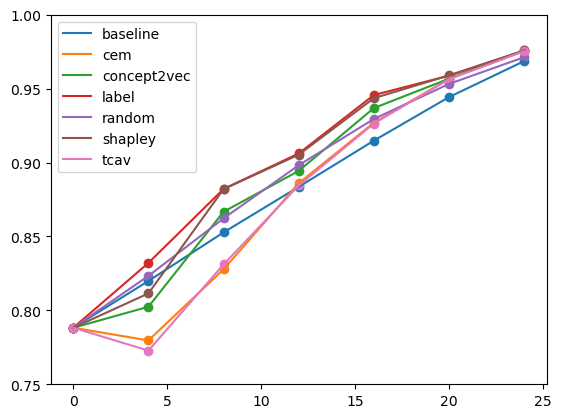

In [19]:
plot_all_results(results,methods)

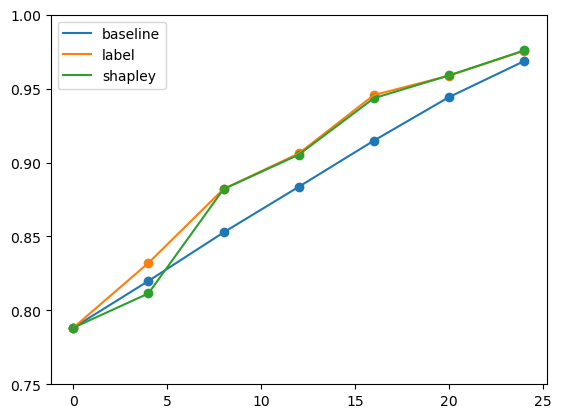

In [20]:
shortened_methods = ['baseline','label','shapley']
plot_all_results([data_by_method[i] for i in shortened_methods],shortened_methods)

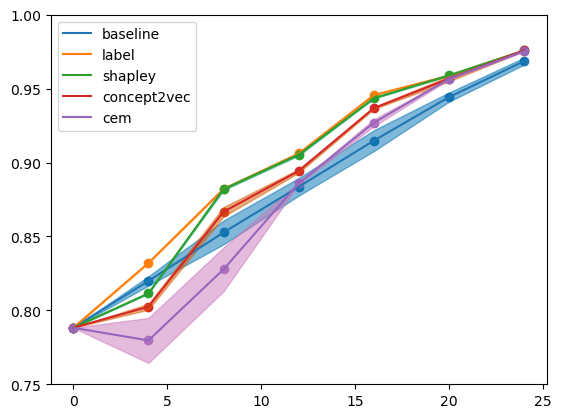

In [28]:
shortened_methods = ['baseline','label','shapley','concept2vec','cem']
plot_all_results([data_by_method[i] for i in shortened_methods],shortened_methods,show_std=True)

## CEM Intervention Ablation

In [32]:
extra_methods = ['shapley_indices','shapley_limit']
extra_data = {}

for m in extra_methods:
    extra_data[str(m)] = pickle.load(open("results/intervention/{}.pkl".format(m),"rb"))
    extra_data[str(m)] = {str(key): value for key, value in extra_data[str(m)].items()}

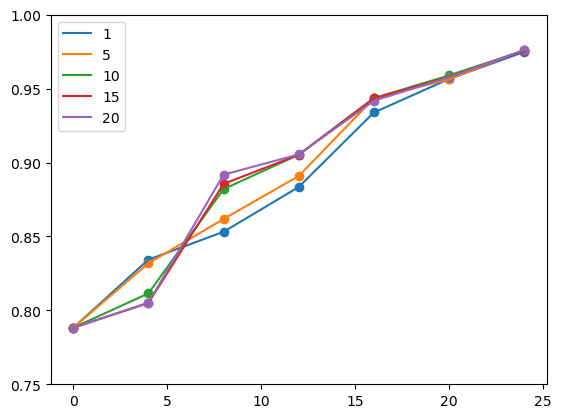

In [37]:
indices = sorted(extra_data['shapley_indices'].keys(),key=lambda k: int(k))
plot_all_results([extra_data['shapley_indices'][i] for i in indices],indices)

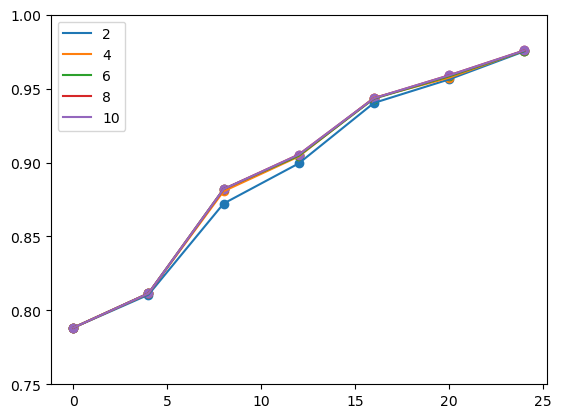

In [39]:
limits = sorted(extra_data['shapley_limit'].keys(),key=lambda k: int(k))
plot_all_results([extra_data['shapley_limit'][i] for i in limits],limits)